<a href="https://colab.research.google.com/github/diegoaxsel99/machine-learning-emg/blob/master/notebooks/5_movimientos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd

url = 'https://raw.githubusercontent.com/diegoaxsel99/machine-learning-emg/master/nn%20csv/nn..csv'

df = pd.read_csv(url)

X = df.iloc[:, :df.shape[1] - 1][df['target'] < 6]
y = df['target'][df['target'] < 6]

In [5]:
from keras.layers import Dense
from keras.models import Sequential

def model(functions,num_neuro, features):
  
  model = Sequential()
  model.add(Dense(num_neuro[0], input_dim = features, activation= functions[0]))

  for i in range(1,len(functions)):
    model.add(Dense(num_neuro[i], activation= functions[i]))

  print(model.summary())

  model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
  
  return model

In [23]:
functions = ['relu','relu','relu','softmax']
num_neuro = [5,5,5,6]
features = X.shape[1]

my_model = model(functions= functions, num_neuro= num_neuro,
                 features = features)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_9 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_11 (Dense)             (None, 6)                 36        
Total params: 126
Trainable params: 126
Non-trainable params: 0
_________________________________________________________________
None


In [26]:
my_model = model(functions,num_neuro,features)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_13 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_14 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_15 (Dense)             (None, 6)                 36        
Total params: 126
Trainable params: 126
Non-trainable params: 0
_________________________________________________________________
None


In [24]:
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y , random_state = 2)

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

print(y_train.shape)

(540, 6)


In [27]:
history = my_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, batch_size=64, verbose=1)

Epoch 1/500
9/9 [==============================] - 0s 22ms/step - loss: 1.8211 - accuracy: 0.1963 - val_loss: 1.8067 - val_accuracy: 0.2056
Epoch 2/500
9/9 [==============================] - 0s 4ms/step - loss: 1.8056 - accuracy: 0.1963 - val_loss: 1.7924 - val_accuracy: 0.2111
Epoch 3/500
9/9 [==============================] - 0s 4ms/step - loss: 1.7906 - accuracy: 0.1963 - val_loss: 1.7786 - val_accuracy: 0.2167
Epoch 4/500
9/9 [==============================] - 0s 4ms/step - loss: 1.7763 - accuracy: 0.3333 - val_loss: 1.7654 - val_accuracy: 0.3889
Epoch 5/500
9/9 [==============================] - 0s 5ms/step - loss: 1.7636 - accuracy: 0.3981 - val_loss: 1.7549 - val_accuracy: 0.3833
Epoch 6/500
9/9 [==============================] - 0s 5ms/step - loss: 1.7541 - accuracy: 0.4259 - val_loss: 1.7469 - val_accuracy: 0.3833
Epoch 7/500
9/9 [==============================] - 0s 4ms/step - loss: 1.7462 - accuracy: 0.4407 - val_loss: 1.7394 - val_accuracy: 0.3833
Epoch 8/500
9/9 [=========

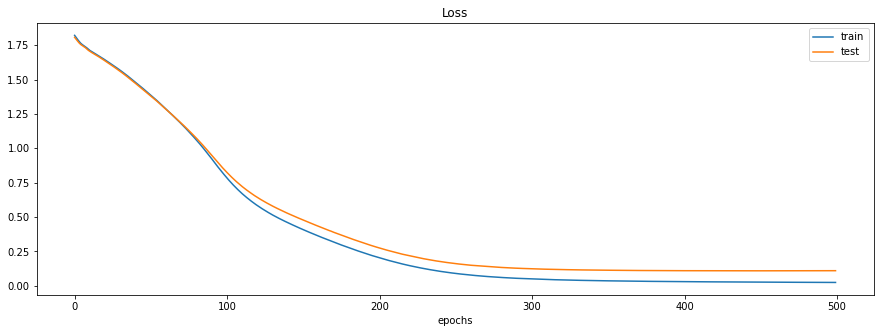

In [28]:

plt.figure(figsize=(15,5))
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel("epochs")
plt.legend()

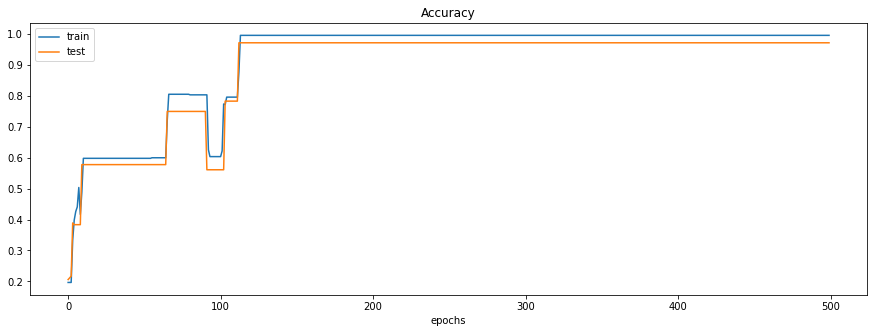

In [29]:
plt.figure(figsize=(15,5))
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.xlabel("epochs")
plt.legend()

In [30]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

In [31]:
def baseline_model():
    # create model
    model = Sequential()
    # The input layer requires the special input_shape parameter which should match
    # the shape of our training data.
    model.add(Dense(5, input_dim=features, activation='relu'))
    model.add(Dense(5, activation='relu'))
    model.add(Dense(5, activation='relu'))
    model.add(Dense(6, activation='softmax'))
    model.summary()
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
    return model

In [32]:
estimator = KerasClassifier(build_fn=baseline_model, verbose=2, batch_size=64, epochs=500)

In [33]:
accuracies = cross_val_score(estimator, X_train, y_train, cv=10, n_jobs=-1)
mean_acc = accuracies.mean()
variance_acc = accuracies.std()
print('Precision media: ', mean_acc,"+/-",variance_acc)

Precision media:  0.9685185194015503 +/- 0.08242301572841944
